In [84]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
!pip install yellowbrick
from sklearn.multioutput import MultiOutputRegressor
from yellowbrick.regressor import ResidualsPlot

In [85]:
# Load the data
data = pd.read_csv("/content/winequalityRED.csv")

In [86]:
# Extract features and target variables
X = data.iloc[ :, :-1].values
y = data.iloc[ :, -1].values

In [87]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# If y_train has only one column, reshape it


In [88]:
# Create and train an XGBRegressor model
XGBmodel = XGBRegressor(n_estimators=100, random_state=0)
XGBmodel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [89]:
y_pred = XGBmodel.predict(X_test)

In [90]:
# Calculate and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, XGBmodel.predict(X_test)))
mae = mean_absolute_error(y_test, XGBmodel.predict(X_test))
mse = mean_squared_error(y_test, XGBmodel.predict(X_test))
r2 = r2_score(y_test, XGBmodel.predict(X_test))
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

RMSE: 0.5926756553831612
MAE: 0.4175254628062248
MSE: 0.3512644324838597
r2: 0.462492298355516


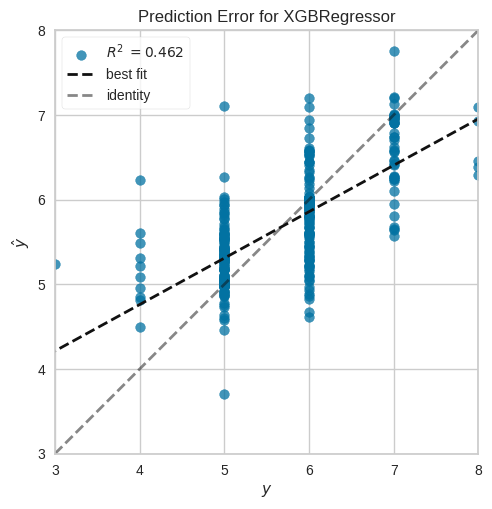

<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [91]:
# # Instantiate the linear model and visualizer
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(XGBmodel)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

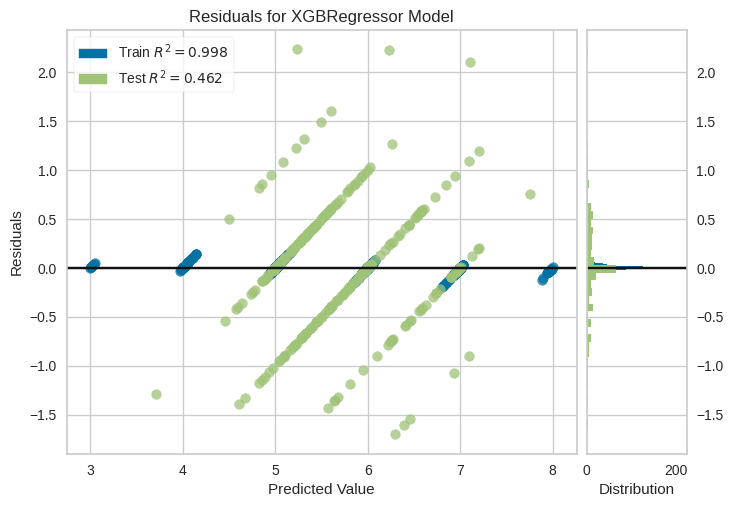

In [92]:
visualizer = ResidualsPlot(XGBmodel)
#fit training data
visualizer.fit(X_train, y_train)
# Generates predicted target values on test data
visualizer.score(X_test, y_test)
#show plot and save it at given path
visualizer.show("Residual_lasso.jpg")

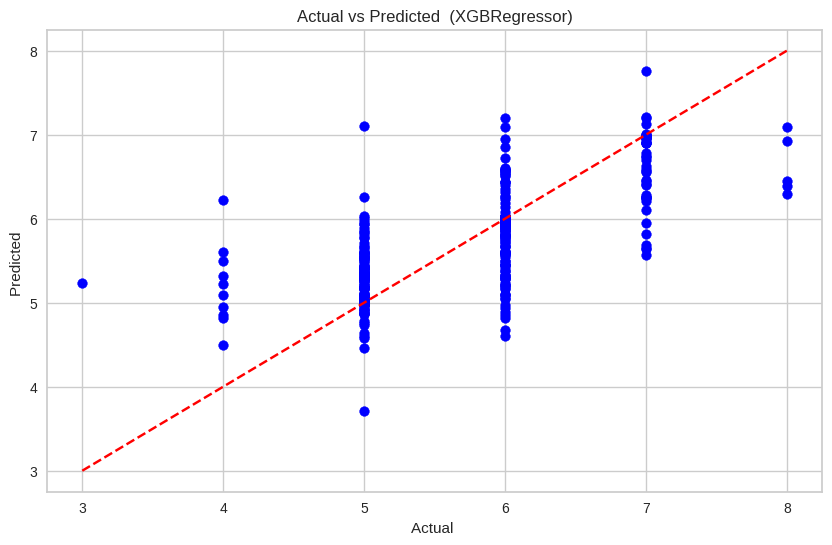

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (XGBRegressor)')
plt.show()

In [94]:
# Create and train a LGBMRegressor model
LGBMmodel = LGBMRegressor(n_estimators=100, random_state=0)
LGBMmodel.fit(X_train, y_train)
y_pred = LGBMmodel.predict(X_test)

# Calculate and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, LGBMmodel.predict(X_test)))
mae = mean_absolute_error(y_test, LGBMmodel.predict(X_test))
mse = mean_squared_error(y_test, LGBMmodel.predict(X_test))
r2 = r2_score(y_test, LGBMmodel.predict(X_test))

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score 5.623925
RMSE: 0.5576538913975712
MAE: 0.42424193636061674
MSE: 0.310977862590854
r2: 0.5241391364290642


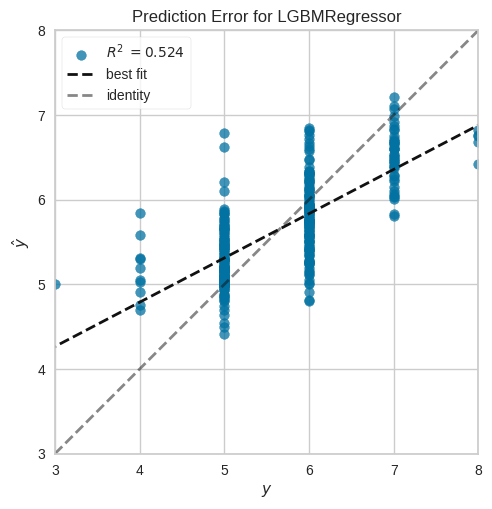

<Axes: title={'center': 'Prediction Error for LGBMRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [95]:
# # Instantiate the linear model and visualizer
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(LGBMmodel)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<Axes: title={'center': 'Residuals for LGBMRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

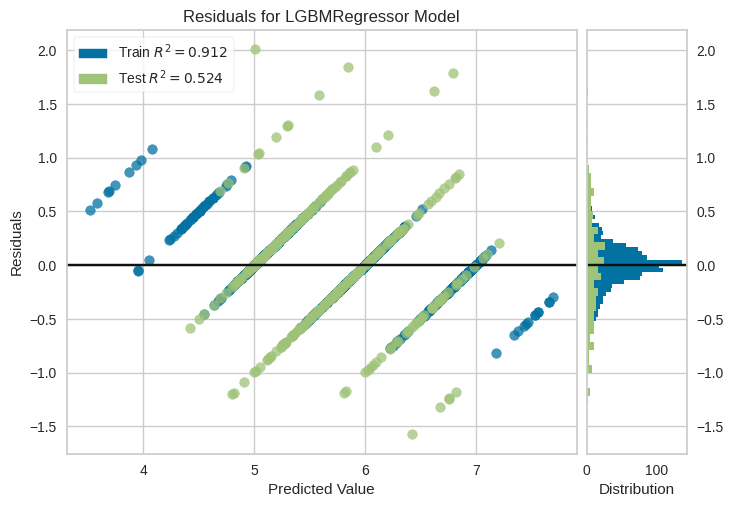

In [96]:
visualizer = ResidualsPlot(LGBMmodel)
#fit training data
visualizer.fit(X_train, y_train)
# Generates predicted target values on test data
visualizer.score(X_test, y_test)
#show plot and save it at given path
visualizer.show("Residual_lasso.jpg")

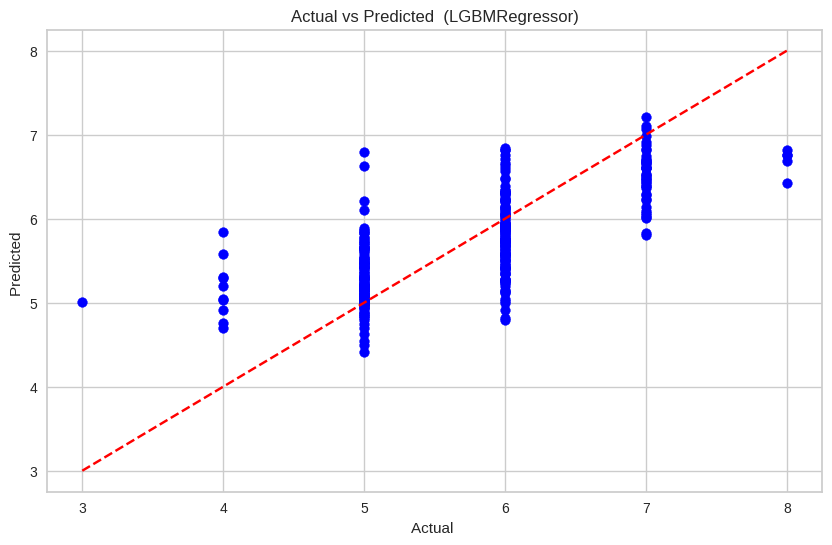

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (LGBMRegressor)')
plt.show()

In [98]:
# Creating a Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
RFmodel.fit(X_train, y_train)

# Making predictions on the test set
y_pred = RFmodel.predict(X_test)
# Calculate and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, RFmodel.predict(X_test)))
mae = mean_absolute_error(y_test, RFmodel.predict(X_test))
mse = mean_squared_error(y_test, RFmodel.predict(X_test))
r2 = r2_score(y_test, RFmodel.predict(X_test))

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

RMSE: 0.5488516420673258
MAE: 0.4224375
MSE: 0.30123812499999997
r2: 0.5390429623873638


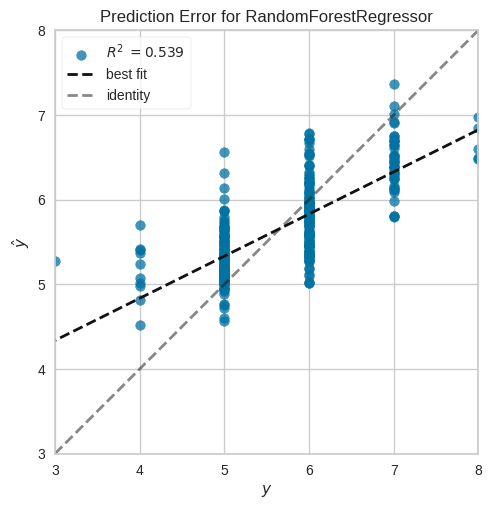

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [99]:
# # Instantiate the linear model and visualizer
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(RFmodel)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

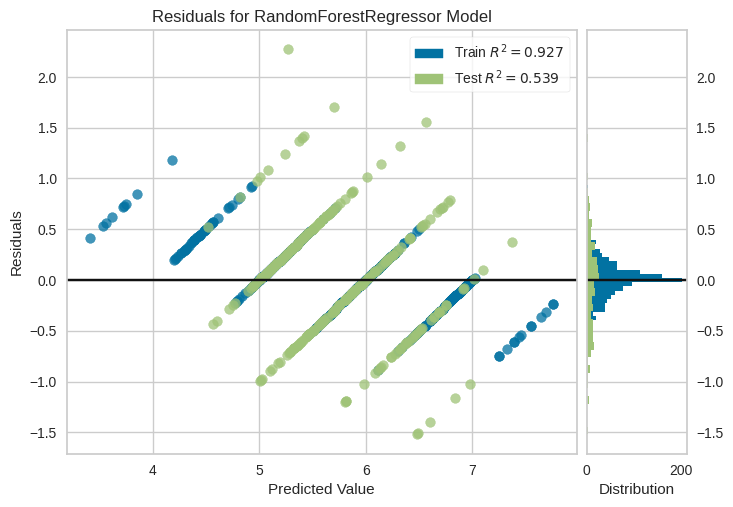

In [100]:
visualizer = ResidualsPlot(RFmodel)
#fit training data
visualizer.fit(X_train, y_train)
# Generates predicted target values on test data
visualizer.score(X_test, y_test)
#show plot and save it at given path
visualizer.show("Residual_lasso.jpg")

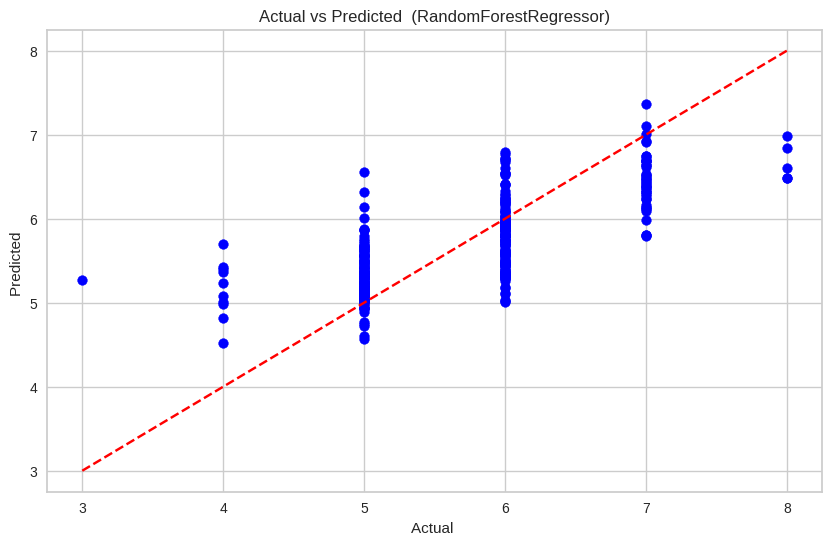

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (RandomForestRegressor)')
plt.show()

In [102]:
# Creating a Gradient Boosting Regression model
from sklearn.ensemble import GradientBoostingRegressor
GBmodel = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the model
GBmodel.fit(X_train, y_train)

# Making predictions on the test set
y_pred = GBmodel.predict(X_test)
# Calculate and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, GBmodel.predict(X_test)))
mae = mean_absolute_error(y_test, GBmodel.predict(X_test))
mse = mean_squared_error(y_test, GBmodel.predict(X_test))
r2 = r2_score(y_test, GBmodel.predict(X_test))

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

RMSE: 0.6019428810232667
MAE: 0.48493624442420186
MSE: 0.3623352320145906
r2: 0.4455516705525475


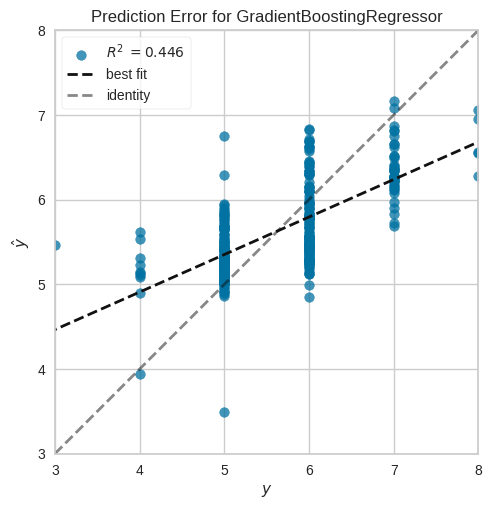

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [103]:
# # Instantiate the linear model and visualizer
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(GBmodel)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

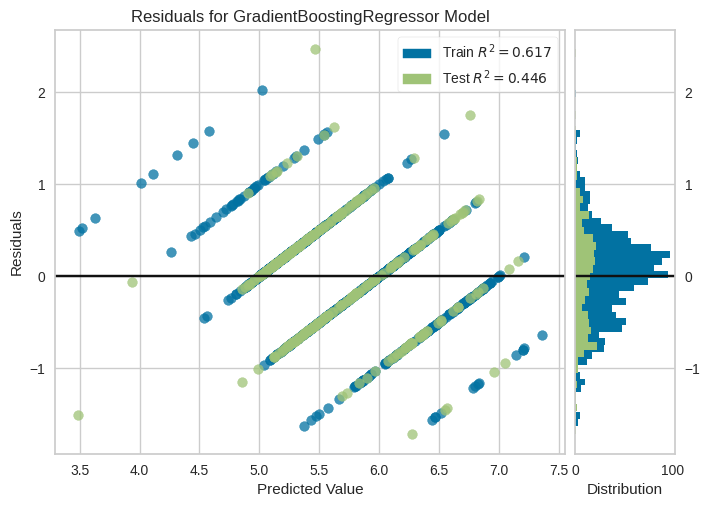

In [104]:
visualizer = ResidualsPlot(GBmodel)
#fit training data
visualizer.fit(X_train, y_train)
# Generates predicted target values on test data
visualizer.score(X_test, y_test)
#show plot and save it at given path
visualizer.show("Residual_lasso.jpg")

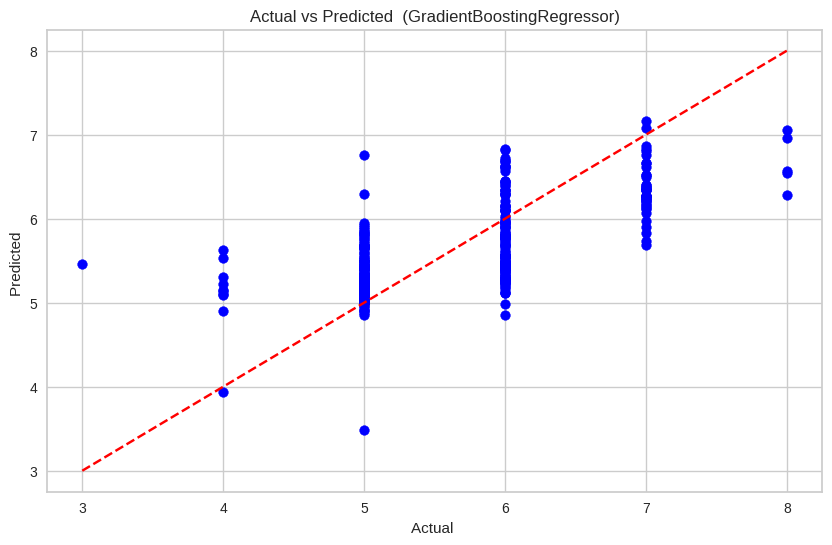

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (GradientBoostingRegressor)')
plt.show()

In [106]:
# Creating an Extra Trees Regression model
from sklearn.ensemble import ExtraTreesRegressor
EXmodel = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Training the model
EXmodel.fit(X_train, y_train)

# Making predictions on the test set
y_pred = EXmodel.predict(X_test)
# Calculate and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, EXmodel.predict(X_test)))
mae = mean_absolute_error(y_test, EXmodel.predict(X_test))
mse = mean_squared_error(y_test, EXmodel.predict(X_test))
r2 = r2_score(y_test, EXmodel.predict(X_test))

print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

RMSE: 0.54059458006902
MAE: 0.38887499999999997
MSE: 0.2922425
r2: 0.5528081411856125


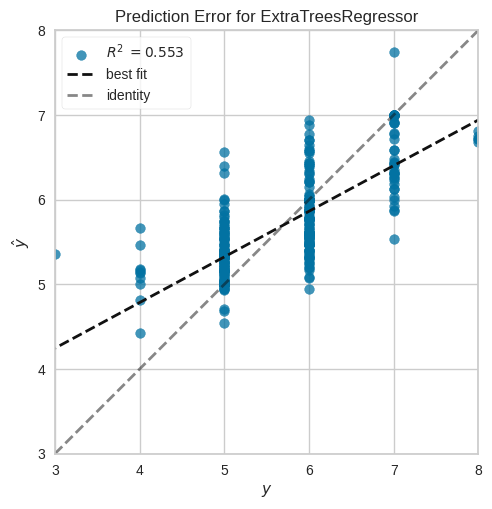

<Axes: title={'center': 'Prediction Error for ExtraTreesRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [107]:
# # Instantiate the linear model and visualizer
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(EXmodel)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<Axes: title={'center': 'Residuals for ExtraTreesRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

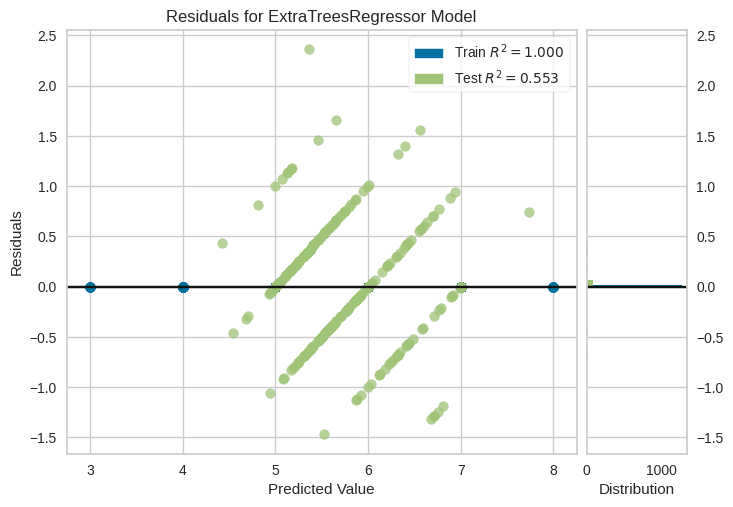

In [108]:
visualizer = ResidualsPlot(EXmodel)
#fit training data
visualizer.fit(X_train, y_train)
# Generates predicted target values on test data
visualizer.score(X_test, y_test)
#show plot and save it at given path
visualizer.show("Residual_lasso.jpg")

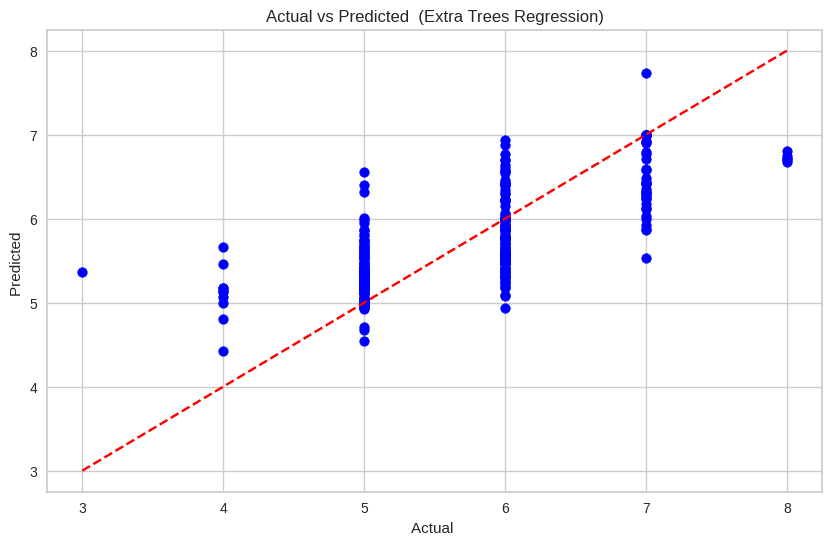

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (Extra Trees Regression)')
plt.show()